### 1. OBJECTIVE

A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score



In [2]:
legitimate = pd.read_csv

In [3]:
urldata = pd.read_csv('urldata.csv')

In [4]:
urldata.head(10)

,Domain,IP,Have@,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Mouse_over,Web_forwarding,Right_click,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,1,1,1,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,1,1,1,0
2,hubpages.com,0,0,1,1,0,0,0,0,1,1,1,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,1,1,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,1,1,1,0
5,nypost.com,0,0,1,4,0,0,1,0,1,1,1,0
6,kienthuc.net.vn,0,0,1,2,0,0,0,0,1,1,1,0
7,thenextweb.com,0,0,1,6,0,0,0,0,1,1,1,0
8,tobogo.net,0,0,1,2,0,0,0,0,1,1,1,0
9,akhbarelyom.com,0,0,1,5,0,0,0,0,1,1,1,0


In [5]:
urldata.shape

(36716, 13)

In [6]:
urldata.columns

Index(['Domain', 'IP', 'Have@', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'Mouse_over',
       'Web_forwarding', 'Right_click', 'Label'],
      dtype='object')

In [7]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36716 entries, 0 to 36715
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Domain          36716 non-null  object
 1   IP              36716 non-null  int64 
 2   Have@           36716 non-null  int64 
 3   URL_Length      36716 non-null  int64 
 4   URL_Depth       36716 non-null  int64 
 5   Redirection     36716 non-null  int64 
 6   https_Domain    36716 non-null  int64 
 7   TinyURL         36716 non-null  int64 
 8   Prefix/Suffix   36716 non-null  int64 
 9   Mouse_over      36716 non-null  int64 
 10  Web_forwarding  36716 non-null  int64 
 11  Right_click     36716 non-null  int64 
 12  Label           36716 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 3.6+ MB


## Visualizing the features 

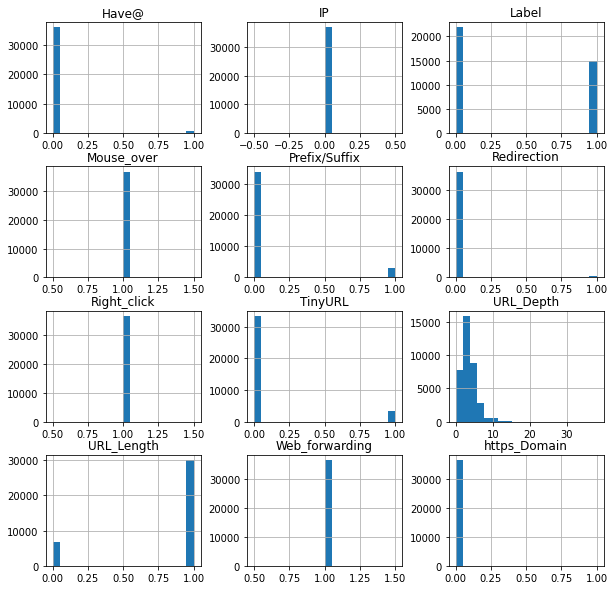

In [8]:
#Plotting the data distribution
urldata.hist(bins = 20,figsize = (10,10))
plt.show()

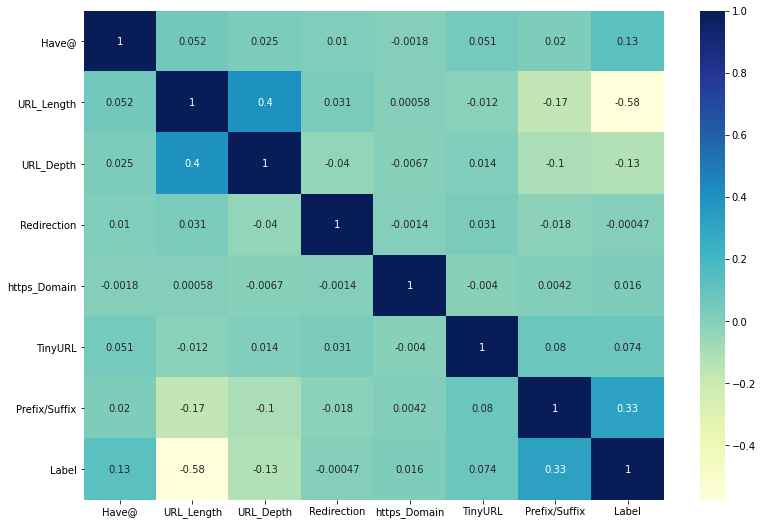

<Figure size 432x288 with 0 Axes>

In [9]:
# correlation matrix
# matrix = np.triu(urldata.corr())

temp_df = urldata.drop(['IP','Mouse_over','Web_forwarding', 'Right_click'], axis=1)

plt.figure(figsize=(13,9))
sns.heatmap(temp_df.corr(), cmap="YlGnBu", annot=True)
plt.show()
plt.savefig("corr matrix.jpg")

In [10]:
urldata.describe().T

,count,mean,std,min,25%,50%,75%,max
IP,36716.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Have@,36716.0,0.020127,0.140438,0.0,0.0,0.0,0.0,1.0
URL_Length,36716.0,0.815802,0.387651,0.0,1.0,1.0,1.0,1.0
URL_Depth,36716.0,3.106302,2.109208,0.0,2.0,3.0,4.0,38.0
Redirection,36716.0,0.012447,0.110871,0.0,0.0,0.0,0.0,1.0
https_Domain,36716.0,0.000163,0.012783,0.0,0.0,0.0,0.0,1.0
TinyURL,36716.0,0.088218,0.283615,0.0,0.0,0.0,0.0,1.0
Prefix/Suffix,36716.0,0.078140,0.268396,0.0,0.0,0.0,0.0,1.0
Mouse_over,36716.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Web_forwarding,36716.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [11]:
urldata.isnull().sum()

Domain            0
IP                0
Have@             0
URL_Length        0
URL_Depth         0
Redirection       0
https_Domain      0
TinyURL           0
Prefix/Suffix     0
Mouse_over        0
Web_forwarding    0
Right_click       0
Label             0
dtype: int64

In [12]:
label_count = pd.DataFrame(urldata.Label.value_counts())

<AxesSubplot:ylabel='Label'>

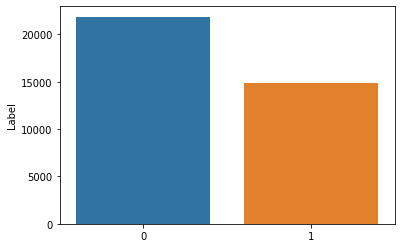

In [13]:
sns.barplot(label_count.index, label_count.Label)

### Shuffling the data in dataset so that when we split data is equally disctributed for training


In [14]:
urldata = urldata.sample(frac=1).reset_index(drop=True)
urldata.head()

,Domain,IP,Have@,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Mouse_over,Web_forwarding,Right_click,Label
0,maybank2u.com.my,0,0,1,4,0,0,0,0,1,1,1,0
1,thenextweb.com,0,0,1,6,0,0,0,0,1,1,1,0
2,whatsapp-invite-groupsex88-whatsappsex.2waky.com,0,0,1,0,0,0,0,1,1,1,1,1
3,censor.net.ua,0,0,1,3,0,0,0,0,1,1,1,0
4,persianblog.ir,0,0,1,3,0,0,0,0,1,1,1,0


In [15]:
urldata.drop(['Domain'], axis = True, inplace = True)

In [16]:
urldata.head()

,IP,Have@,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Mouse_over,Web_forwarding,Right_click,Label
0,0,0,1,4,0,0,0,0,1,1,1,0
1,0,0,1,6,0,0,0,0,1,1,1,0
2,0,0,1,0,0,0,0,1,1,1,1,1
3,0,0,1,3,0,0,0,0,1,1,1,0
4,0,0,1,3,0,0,0,0,1,1,1,0


## Splitting the data for training and testing


In [17]:
X = urldata.drop(['Label'], axis=True)
Y = urldata['Label']

In [18]:
urldata.head()

,IP,Have@,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Mouse_over,Web_forwarding,Right_click,Label
0,0,0,1,4,0,0,0,0,1,1,1,0
1,0,0,1,6,0,0,0,0,1,1,1,0
2,0,0,1,0,0,0,0,1,1,1,1,1
3,0,0,1,3,0,0,0,0,1,1,1,0
4,0,0,1,3,0,0,0,0,1,1,1,0


In [19]:
X.shape, Y.shape

((36716, 11), (36716,))

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((25701, 11), (11015, 11))

## Machine Learning Model and Training 

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [22]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### Model 1: Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0)
logreg.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
#predicting the target value from the model for the samples
y_test_log = logreg.predict(X_test)
y_train_log = logreg.predict(X_train)

#### Performance Evaluation

In [55]:
#computing the precision of the model performance
acc_train_log = precision_score(Y_train,y_train_log)
acc_test_log = precision_score(Y_test,y_test_log)

print("Logistic Regression: Precision on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression: Precision on test Data: {:.3f}".format(acc_test_log))



Logistic Regression: Precision on training Data: 0.960
Logistic Regression: Precision on test Data: 0.964


In [56]:
#computing the accuracy of the model performance
acc_train_log = recall_score(Y_train,y_train_log)
acc_test_log = recall_score(Y_test,y_test_log)

print("Logistic Regression: Recall score on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression: Recall score test Data: {:.3f}".format(acc_test_log))



Logistic Regression: Recall score on training Data: 0.599
Logistic Regression: Recall score test Data: 0.605


Average precision-recall score: 0.74


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.74')

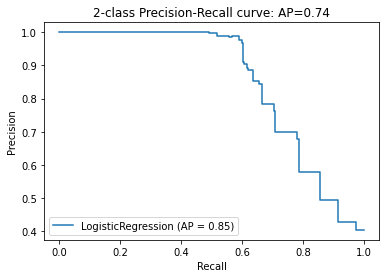

In [45]:
average_precision = average_precision_score(Y_test, y_test_log)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(logreg, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Model 2: Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [28]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#### Performance Evaluation

In [29]:
#computing the accuracy of the model performance
acc_train_tree = precision_score(Y_train,y_train_tree)
acc_test_tree = precision_score(Y_test,y_test_tree)

print("Decision Tree: Precision on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Precision on test Data: {:.3f}".format(acc_test_tree))


Decision Tree: Precision on training Data: 0.966
Decision Tree: Precision on test Data: 0.967


In [58]:
#computing the accuracy of the model performance
acc_train_tree = recall_score(Y_train,y_train_tree)
acc_test_tree = recall_score(Y_test,y_test_tree)

print("Decision Tree: Recall on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Recall on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Recall on training Data: 0.600
Decision Tree: Recall on test Data: 0.605


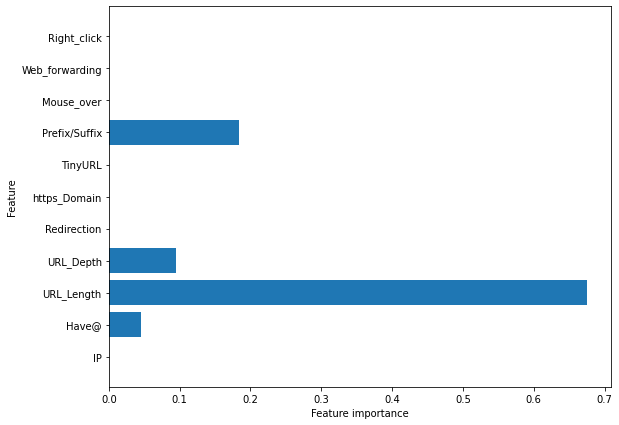

In [30]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

Average precision-recall score: 0.74


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.74')

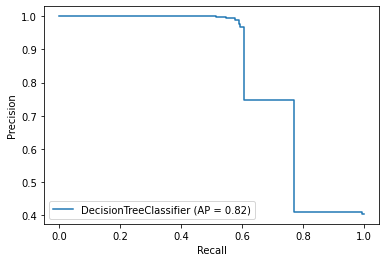

In [47]:
average_precision_dt = average_precision_score(Y_test, y_test_tree)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_dt))

disp_dt = plot_precision_recall_curve(tree, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision_dt))

### Model 3: Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# instantiate the model
forest = RandomForestClassifier(random_state=42)

In [32]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [114]:
CV_rfc = GridSearchCV(estimator=forest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [115]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [33]:
rfc = RandomForestClassifier(random_state=42, criterion='gini',max_depth=8, max_features='auto', n_estimators=200)
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [34]:
#predicting the target value from the model for the samples
y_test_forest = rfc.predict(X_test)
y_train_forest = rfc.predict(X_train)

In [35]:
#computing the accuracy of the model performance
acc_train_forest = precision_score(Y_train,y_train_forest)
acc_test_forest = precision_score(Y_test,y_test_forest)

print("Random forest: Precision on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Precision on test Data: {:.3f}".format(acc_test_forest))

Random forest: Precision on training Data: 0.963
Random forest: Precision on test Data: 0.958


In [60]:
#computing the accuracy of the model performance
acc_train_forest = recall_score(Y_train,y_train_forest)
acc_test_forest = recall_score(Y_test,y_test_forest)

print("Random forest: Recall on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Recall on test Data: {:.3f}".format(acc_test_forest))

Random forest: Recall on training Data: 0.630
Random forest: Recall on test Data: 0.629


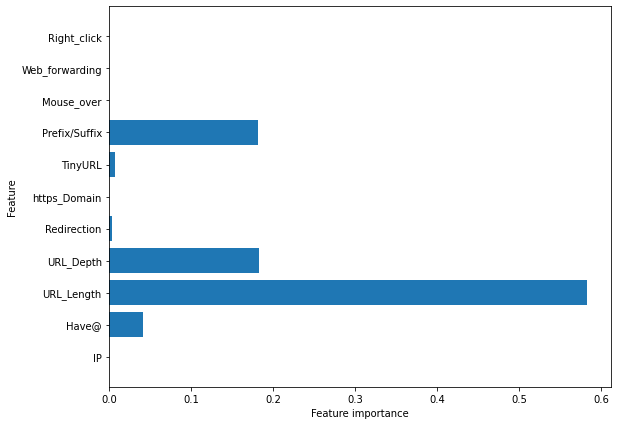

In [36]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

Average precision-recall score: 0.75


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.75')

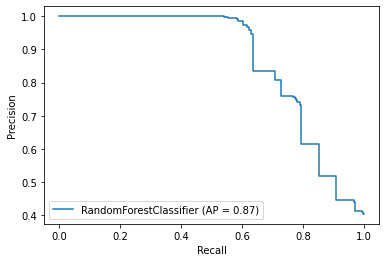

In [68]:
average_precision_rf = average_precision_score(Y_test, y_test_forest)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_rf))

disp_rf = plot_precision_recall_curve(rfc, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision_rf))
# axes.yaxis.label.set_size(20)

### Model 4: MultiLayer Perceptron


In [62]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.005, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, Y_train)

MLPClassifier(alpha=0.005, hidden_layer_sizes=[100, 100, 100])

In [63]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [64]:
#computing the accuracy of the model performance
acc_train_mlp = precision_score(Y_train,y_train_mlp)
acc_test_mlp = precision_score(Y_test,y_test_mlp)

print("Multilayer Perceptrons: Precision on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Precision on test Data: {:.3f}".format(acc_test_mlp))


Multilayer Perceptrons: Precision on training Data: 0.970
Multilayer Perceptrons: Precision on test Data: 0.968


In [65]:
#computing the accuracy of the model performance
acc_train_mlp = recall_score(Y_train,y_train_mlp)
acc_test_mlp = recall_score(Y_test,y_test_mlp)

print("Multilayer Perceptrons: Recall on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Recall on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Recall on training Data: 0.625
Multilayer Perceptrons: Recall on test Data: 0.624


In [66]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, y_test_mlp )

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.76


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.76')

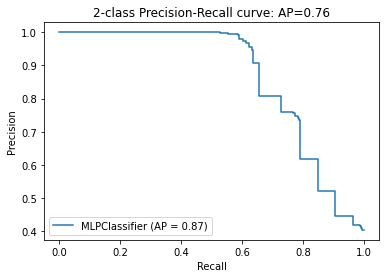

In [67]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(mlp, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Trying to improve the predictive performance with Neural Networks


In [134]:
#Applying neural network using tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [159]:
#Initializing the ANN
ann_classifier = Sequential()

#Adding the input layer and first hidden layer
ann_classifier.add(Dense(units=50, kernel_initializer='uniform', activation='relu', input_dim=11))

# Adding the second hidden layer
ann_classifier.add(Dense(units=30, kernel_initializer = 'uniform', activation = 'relu'))

#Adding the output layer
ann_classifier.add(Dense(units=1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
ann_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Precision()])



In [160]:
# Fitting the ANN to the Training set
history = ann_classifier.fit(X_train, Y_train, batch_size = 10, epochs = 50, verbose = 1, validation_data=(X_test, Y_test))



Train on 25701 samples, validate on 11015 samples
Epoch 1/50
25701/25701 [==============================] - 5s 207us/step - loss: 0.4233 - precision_1: 0.9322 - val_loss: 0.4005 - val_precision_1: 0.9422
Epoch 2/50
25701/25701 [==============================] - 6s 214us/step - loss: 0.3982 - precision_1: 0.9441 - val_loss: 0.4065 - val_precision_1: 0.9449
Epoch 3/50
25701/25701 [==============================] - 7s 281us/step - loss: 0.3928 - precision_1: 0.9476 - val_loss: 0.3935 - val_precision_1: 0.9514
Epoch 4/50
25701/25701 [==============================] - 6s 240us/step - loss: 0.3896 - precision_1: 0.9545 - val_loss: 0.3883 - val_precision_1: 0.9567
Epoch 5/50
25701/25701 [==============================] - 6s 244us/step - loss: 0.3869 - precision_1: 0.9584 - val_loss: 0.3927 - val_precision_1: 0.9588
Epoch 6/50
25701/25701 [==============================] - 6s 225us/step - loss: 0.3855 - precision_1: 0.9596 - val_loss: 0.3850 - val_precision_1: 0.9605
Epoch 7/50
25701/25701 [==

In [162]:
print(history.history.keys())


dict_keys(['val_loss', 'val_precision_1', 'loss', 'precision_1'])


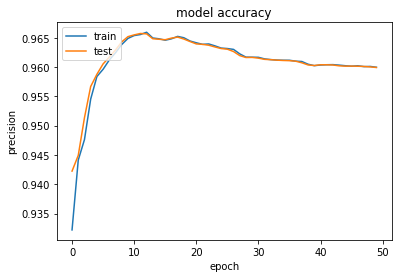

In [163]:
plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])
plt.title('model accuracy')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

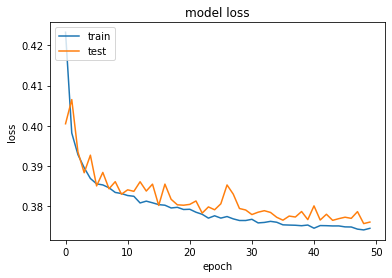

In [164]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [157]:
prediction = ann_classifier.predict(X_test)
prediction = (prediction>0.5)
score = ann_classifier.evaluate(X_test, Y_test)
score

11015/11015 [==============================] - 0s 22us/step


[0.3824681696178044, 0.9598391056060791]

In [165]:
precision = precision_score(Y_test, prediction)
print('Precision score {}'.format(precision))
print(confusion_matrix(Y_test, prediction))
print(classification_report(Y_test, prediction))

Precision score 0.9830124575311439
[[6584   45]
 [1782 2604]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      6629
           1       0.98      0.59      0.74      4386

    accuracy                           0.83     11015
   macro avg       0.89      0.79      0.81     11015
weighted avg       0.87      0.83      0.82     11015

